# 🚜 Predicting the Sale Price of Bulldozers using Machine Learning

In this notebook, we're going to go through an example machine learning project with the goal of\
predicting the sale price of bulldozers.

https://www.kaggle.com/c/bluebook-for-bulldozers

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its\
characteristics and previous examples of how much similar bulldozers have been\
sold for?

## 2. Data

The data is downloaded from the Kaggle Bluebook for Bulldozer competition:
https://www.kaggle.com/c/bluebook-for-bulldozers/data

There are three main data sets:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You\
make predictions on this set throughout the majority of the competition. Your score on this set\
is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It\
contains data from May 1, 2012 - November 2012. Your score on the test set determines your\
final rank for the competition.

## 3. Evaluation

The evaluation metric for this competition is the RMSLE (root mean squared log error) between the\
actual and predicted auction prices.

For more on the evaluation of this project check: https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

**Note:** the goal for most regression evaluation metrics is to minimize the error.\
For example, our goal for this project will be to build a machine learning model\
which minimises RMSLE.

## 4. Features

Kaggle provides a data dictionary detailing all of the features of the dataset. You can view this data\
dictionary on Google Sheets: https://docs.google.com/spreadsheets/d/1A-i1_gDIL1TPaRcDaqFsIFEyqaeTN8J5K34vmExZdYc/edit?usp=sharing

In [2]:
# Import data analysis tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

# Print the versions we're using 
print(f"Pandas version:{pd.__version__}")
print(f"NumPy version:{np.__version__}")
import matplotlib
print('Matplotlib: {}'.format(matplotlib.__version__))
print(f"Scikit-Learn version:{sklearn.__version__}")

Pandas version:2.2.3
NumPy version:2.2.1
Matplotlib: 3.10.0
Scikit-Learn version:1.5.2


In [3]:
# Import training and validation sets
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False)

In [92]:
# Get information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [93]:
# Check if there are missing values
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

In [94]:
# Check the columns
df.columns

Index(['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource',
       'auctioneerID', 'YearMade', 'MachineHoursCurrentMeter', 'UsageBand',
       'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls'],
      dtype='object')

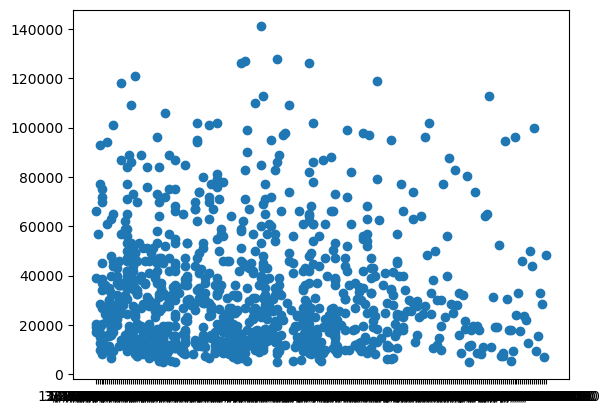

In [95]:
# Make a plot of the most important variables
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000])
plt.show()

# In this case i chose saledate because it's a Time Series

In [96]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [23]:
# the data type of "saledate" is object

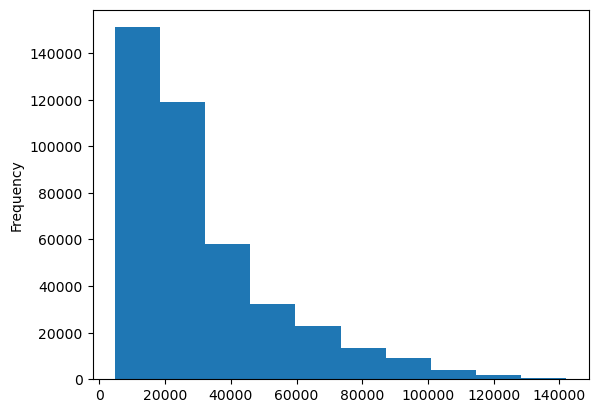

In [97]:
# Distribution of the Sale Price column 
df.SalePrice.plot.hist();
plt.show()

We can see that a large majority/portion of our Sale Prices are below 20000 USD, and then we've got some\
below 30000 USD, and the some of them below 40000 USD, and then it just keeps going off and there's less\
and less and there's not very many Bulldozers that are costing upwards 100000 USD.

In [18]:
# When you are dealing with Time Series, you want as much information to be encoded in the dates
# as possible.

### Parsing dates

When we work with time series data, we want to enrich the time & date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter

In [98]:
# This is going to turn whichever column we pass to parse_dates into a date time object

# Import data again but this time parse dates
df = pd.read_csv("data/bluebook-for-bulldozers/TrainAndValid.csv",
                 low_memory=False,
                 parse_dates=["saledate"]) 
# we pass it the colum ["saledate"] because that's where our dates are.

In [99]:
df.saledate.dtype

dtype('<M8[ns]')

In [100]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

In [33]:
# it looks like this yyyy/mm/dd because pandas passed it parse_dates, it's gone over all of the values in saledate column and converted it into
# this yyyy/mm/dd  style, so we've got year/month/day.. And we can see that the data type is datetime64. In numpy <M8[ns] and datetime64[ns] are equivalent

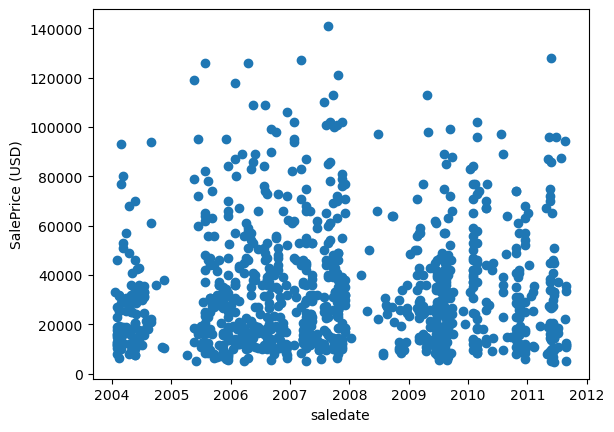

In [101]:
fig, ax = plt.subplots()
ax.scatter(df["saledate"][:1000], df["SalePrice"][:1000]);
plt.ylabel("SalePrice (USD)")
plt.xlabel("saledate")
plt.show()

In [102]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [103]:
df.head().T

,0,1,2,3,4
SalesID,1139246,1139248,1139249,1139251,1139253
SalePrice,66000.0,57000.0,10000.0,38500.0,11000.0
MachineID,999089,117657,434808,1026470,1057373
ModelID,3157,77,7009,332,17311
datasource,121,121,121,121,121
auctioneerID,3.0,3.0,3.0,3.0,3.0
YearMade,2004,1996,2001,2001,2007
MachineHoursCurrentMeter,68.0,4640.0,2838.0,3486.0,722.0
UsageBand,Low,Low,High,High,Medium
saledate,2006-11-16 00:00:00,2004-03-26 00:00:00,2004-02-26 00:00:00,2011-05-19 00:00:00,2009-07-23 00:00:00


In [ ]:
# pandas trunkate the df when it is too long. But if you want to see every column, you can transpose it and do df.head().T, 
# So now we'll see the first five rows across the top (this are columns now), and in the other axis we will have all the features.

In [104]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

So we've got different sales dates, examples from different years, different months, different days. It would be better if it is all in order.

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [105]:
# Sort DataFrame in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
# inplace is going to make our change
df.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Make a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we've still got our original data.

In [131]:
# Make a copy
df_tmp = df.copy()

In [132]:
df_tmp.saledate.head(20)

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
54653    1989-01-31
81383    1989-01-31
204924   1989-01-31
135376   1989-01-31
113390   1989-01-31
113394   1989-01-31
116419   1989-01-31
32138    1989-01-31
127610   1989-01-31
76171    1989-01-31
127000   1989-01-31
128130   1989-01-31
127626   1989-01-31
55455    1989-01-31
55454    1989-01-31
Name: saledate, dtype: datetime64[ns]

If we make changes on df_tmp those changes won't be reflected on df. If we ever need to, we can revert back to df\
as our original data frame and we can manipulate df_tmp as much as we want because we know we've still got the original.

In [76]:
# We can start to edit df_tmp without any worries of damaging our original data. So if we ever needed to revert back to it, we can with
# no troubles at all.

# I can read the documentation: https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html

### Add datetime parameters for `saledate` column

Let's enrich our dataframe with a few columns pertaining to these different values.

In [133]:
df_tmp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int32

In [ ]:
# that's accessed the year

In [134]:
df_tmp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int32

In [ ]:
# that's accessed the day

In [135]:
df_tmp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [ ]:
# that's accessed the date

In [136]:
# We're going to create a column at the end of the df. we're accessing the saledate column and then we can acces the date time part of sale,
# and then we can access the year attribute by putting dt.year: the year of the date time.
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp["saleMonth"] = df_tmp.saledate.dt.month
df_tmp["saleDay"] = df_tmp.saledate.dt.day
df_tmp["saleDayOfWeek"] = df_tmp.saledate.dt.dayofweek
df_tmp["saleDayOfYear"] = df_tmp.saledate.dt.dayofyear

# i can functionize this

In [137]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [64]:
# So with this information, we probably we won't need the saledate column anymore, probably a bit of excess now.

In [138]:
# Now we've enriched our DataFrame with date time features, we can remove saledate
df_tmp.drop("saledate", axis=1, inplace=True)

In [139]:
df_tmp.saledate

AttributeError: 'DataFrame' object has no attribute 'saledate'

In [ ]:
# it returns error because 'saledate' doesn't exist anymore

In [140]:
# Check the values of different columns (this is part of EDA: exploratory data analysis)
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Iowa               1336
Montana            1336
Oklahoma           1326
Nebraska            866
West Virgi

In [ ]:
# this is you're just looking at the spread of data, that's another way of looking at the distribution.

In [141]:
len(df_tmp)

412698

## 5. Modelling

We've done enough EDA (we could always do more) but let's start to do some model-driven EDA.

In [142]:
# Let's build a machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs=1,
                              random_state=42)
# n_jobs=1 means that is going to use as many cores as possible on my computer

model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])    # the arguments of the function are X & y

ValueError: could not convert string to float: 'Low'

In [143]:
# This error is because all of our data is not in numeric format.
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   SalesID                   412698 non-null  int64         
 1   SalePrice                 412698 non-null  float64       
 2   MachineID                 412698 non-null  int64         
 3   ModelID                   412698 non-null  int64         
 4   datasource                412698 non-null  int64         
 5   auctioneerID              392562 non-null  float64       
 6   YearMade                  412698 non-null  int64         
 7   MachineHoursCurrentMeter  147504 non-null  float64       
 8   UsageBand                 73670 non-null   object        
 9   saledate                  412698 non-null  datetime64[ns]
 10  fiModelDesc               412698 non-null  object        
 11  fiBaseModel               412698 non-null  object        
 12  fi

In [144]:
df_tmp["UsageBand"].dtype

dtype('O')

In [145]:
# object, maybe is a string or something like that. and the other things is we've got a whole bunch of missing values
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

From what we know about our Machine Learning models, we're trying to get into modeling, but we've got data that is not numeric\
(strings) and missing values. So, before we build a machine learning model, we'll have to tackle this issue.

### Convert string to categories

One way we can turn all of our data into numbers is by converting them into pandas categories.

We can check the different datatypes compatible with pandas here (Data types related functionality):

https://pandas.pydata.org/docs/reference/api/pandas.api.types.union_categoricals.html#pandas.api.types.union_categoricals\
https://pandas.pydata.org/docs/reference/api/pandas.api.types.infer_dtype.html \
https://pandas.pydata.org/docs/reference/api/pandas.api.types.pandas_dtype.html Convert input into a pandas only dtype object or a numpy dtype object.

In [146]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [148]:
pd.api.types.is_object_dtype(df_tmp["UsageBand"])

True

In [149]:
# Find the columns which contain strings (object)
for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        print(label)

# it loops through the temporary dataframe and for each row, it takes the name of the variable (feature), it assign it to the label variable
# and it takes the value and assign it to content, then it checks if the content is a string (object), if it's a string (object) it prints it. 

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


In [84]:
# it tells us all the columns that contain the string data type

In [125]:
# the previous fragment of code is equal to the following: it does the same thing
random_dict = {"key1": "hello",
               "key2": "world!"}

for key, value in random_dict.items():
    print(f"this is a key: {key}",
          f"this is a value: {value}")

this is a key: key1 this is a value: hello
this is a key: key2 this is a value: world!


In [153]:
# This will turn all of the string values into category values

for label, content in df_tmp.items():
    if pd.api.types.is_object_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered()

# pd.api.types.is_object_dtype(content), so basically, is this content a string (object)? if true we want to change that column
# df_tmp[label] access that column name, we want to set it equal to the content, keep the column name but change the content to astype category
# cat.as_ordered() means that these are now ordered alphabetically.

In [151]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412698 entries, 205615 to 409203
Data columns (total 57 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   412698 non-null  int64   
 1   SalePrice                 412698 non-null  float64 
 2   MachineID                 412698 non-null  int64   
 3   ModelID                   412698 non-null  int64   
 4   datasource                412698 non-null  int64   
 5   auctioneerID              392562 non-null  float64 
 6   YearMade                  412698 non-null  int64   
 7   MachineHoursCurrentMeter  147504 non-null  float64 
 8   UsageBand                 73670 non-null   category
 9   fiModelDesc               412698 non-null  category
 10  fiBaseModel               412698 non-null  category
 11  fiSecondaryDesc           271971 non-null  category
 12  fiModelSeries             58667 non-null   category
 13  fiModelDescriptor         748

In [152]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [156]:
# They still look like strings.. However, under the hood, pandas is treating these as numbers. So 'Alabama' might be 1,
# 'Alaska' might be 2, 'Arizona' might be 3, and so on.

We change their data type to categories and we give it them order

In [157]:
df_tmp.state.cat.codes    # now we're accessing the category.codes

205615    43
274835     8
141296     8
212552     8
62755      8
          ..
410879     4
412476     4
411927     4
407124     4
409203     4
Length: 412698, dtype: int8

In [158]:
# So now our dataframe_temporary can be accessed.

So now we have all these categories here and we have a way to access their numeric value

In [155]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

Thanks to pandas Categories we now have a way to access all of our data in the form of numbers.

But we still have a bunch of missing data..

In [160]:
# Check missing data
df_tmp.isnull().sum()/len(df_tmp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.048791
YearMade                    0.000000
MachineHoursCurrentMeter    0.642586
UsageBand                   0.821492
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.340993
fiModelSeries               0.857845
fiModelDescriptor           0.818715
ProductSize                 0.524851
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.740520
Enclosure                   0.000809
Forks                       0.520921
Pad_Type                    0.803498
Ride_Control                0.629928
Stick                       0.803498
Transmission                0.544444
Turbocharged                0.803498
B

In [161]:
# There aren't missing values in the features SalesID, SalePrice, MachineID, ModelID, datasource, auctioneerID, YearMade ..
# altough there are missing values in the MachineHoursCurrentMeter, UsageBand features.
# but MachineHoursCurrentMeter Hhas 60% of missing data, UsageBand has 80% of missing data, and so on..
# there are features that have 90% of missing values.

### Save preprocesed

Since we've made some changes in our df_tmp we'll save it in a csv

In [162]:
# Export current tmp dataframe
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv",
              index=False)

In [4]:
# Import preprocessed data
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv",
                     low_memory=False)

In [5]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [10]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Fill missing values

This should be done after we split the data into training and validation sets: 
1. Split the data into training and validation sets.
2. Fill the missing values of the training set. 
3. Fill the missing values of the validation set.

Work with the training and validation set in a separately way. Otherwise, we will be\
training and fitting our model with information from the future (validation set),\
which is wrong ! Splitting data after filling it is wrong. First you have to split the data\
and then you have to fill the missing values of each part.

### Fill numerical missing values first

In [11]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(label)
# https://pandas.pydata.org/docs/reference/api/pandas.api.types.is_numeric_dtype.html

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [12]:
# these variables are of numeric dtype. And now what we might do is find out which ones of these have missing values.

df_tmp.ModelID

0          8434
1         10150
2          4139
3          8591
4          4089
          ...  
412693     5266
412694    19330
412695    17244
412696     3357
412697     4701
Name: ModelID, Length: 412698, dtype: int64

In [13]:
# Check for which numeric columns have null values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():    # Are there null values in the content (values of the feature/ in the whole column)? .sum() obtain the total
            print(label)    # if there is any null values, so if the condition is higher tan zero, we want to print the label
# pandas.isnull(object) detects missing values for an array-like object

auctioneerID
MachineHoursCurrentMeter


In [14]:
# Fill numeric rows with the median
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():   
            # Add a binary column which tells us if the data was missing or not
            df_tmp[label+"_is_missing"] = pd.isnull(content)    # we add this column to indicate that variable was missing, we keep that information
            # Fill missing numeric values with median
            df_tmp[label] = content.fillna(content.median()) # and then we complete the missing value with the median, median is more robus than the mean

In [15]:
# Demonstrate how median is more robust than mean
hundreds = np.full((1000,), 100)
hundreds_billion = np.append(hundreds, 1000000000)
np.mean(hundreds), np.mean(hundreds_billion), np.median(hundreds), np.median(hundreds_billion)
# for example, there are 100 people with a 1000 USD in their pockets
# and then appears someone who has 1 billion USD in his pocket.

(np.float64(100.0),
 np.float64(999100.8991008991),
 np.float64(100.0),
 np.float64(100.0))

In [175]:
# the mean is very volatile and susceptible to change when we add an outlier. while the median is not affected by the outlier, it is more robust.

In [16]:
# Check if there's any null numeric values
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)
# it doesn't print anything because we have filled the missing values with the median

In [17]:
# Check to see how many examples were missing
df_tmp.auctioneerID_is_missing.value_counts()

auctioneerID_is_missing
False    392562
True      20136
Name: count, dtype: int64

In [ ]:
# This means that we fill up 20136 values in the auctioneerID column with the median of the original auctioneerID column

In [18]:
df_tmp.isna().sum()

SalesID                                     0
SalePrice                                   0
MachineID                                   0
ModelID                                     0
datasource                                  0
auctioneerID                                0
YearMade                                    0
MachineHoursCurrentMeter                    0
UsageBand                              339028
fiModelDesc                                 0
fiBaseModel                                 0
fiSecondaryDesc                        140727
fiModelSeries                          354031
fiModelDescriptor                      337882
ProductSize                            216605
fiProductClassDesc                          0
state                                       0
ProductGroup                                0
ProductGroupDesc                            0
Drive_System                           305611
Enclosure                                 334
Forks                             

### Filling and turning categorical variables into numbers


In [19]:
# Check for columns which aren't numeric
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):    # If the variable is not numeric then 
        print(label)                                  # print the variables (columns) that aren't numeric, the categorical.

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls


When we turned a string column into categories, we had access to an attribute called Codes, which\
gave us a numerical value for all of the variables in that column (es un mapeo de strings a numeros enteros)

In [20]:
# Turn categorical variables into numbers and fill missing values
for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        # Add a binary column to indicate wether sample had missing value
        df_tmp[label+"_is_missing"] = pd.isnull(content)    # if the categorical value is missing, it'll return true
        # Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1    # if there was some missing value in here, it assings that a code of -1,
                                                             # and we don't want -1, we want zero

In [21]:
pd.Categorical(df_tmp["state"]).codes

array([43,  8,  8, ...,  4,  4,  4], shape=(412698,), dtype=int8)

In [31]:
pd.Categorical(df_tmp["UsageBand"]).codes    # if we had not added the +1 it would have printed array([-1, -1, -1, ..., -1, -1, -1] 

array([0, 0, 0, ..., 0, 0, 0], shape=(412698,), dtype=int8)

In [32]:
# That way we know zero is actually a missing value

# This is how we turn all of the variables in the state column into numbers
# So what this is going to do is go Pandas' Categorical type and then we're going to pass it df_tmp[state]
# .Codes we access the codes.. so this is how we turn all of the categorical values in the state column into numers

In this previous fragment of code, we have turned the object variables into variables of dtype category,\
we're taking those missing values, if the rows have a missing value, that row will be assigned a -1, but\
we're adding a +1 to the code, So all the missing values are going to be zero and all of the values that are\
still there, the categories, are going to be some number, pertaining to whatever pandas decided that categories\
are.

In [22]:
df_tmp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Columns: 103 entries, SalesID to Steering_Controls_is_missing
dtypes: bool(46), float64(3), int16(4), int64(10), int8(40)
memory usage: 77.9 MB


In [23]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
...,...,...,...,...,...
Backhoe_Mounting_is_missing,False,True,False,True,False
Blade_Type_is_missing,False,True,False,True,False
Travel_Controls_is_missing,False,True,False,True,False
Differential_Type_is_missing,True,False,True,False,True


In [33]:
# For example, in the Differential_Type_is_missing	True, we know that the value of the feature Differential_Type of that row
# it has been filled with a number, and because there was a missing value there, it is going to be fill with a zero, so we should find a zero there.

In [24]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

Now that all of data is numeric as well as our dataframe has no missing values, we should be able\
to build a machine learning model.

In [25]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,18.0,1974,0.0,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,99.0,1980,0.0,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,99.0,1978,0.0,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,99.0,1980,0.0,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,99.0,1984,0.0,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [26]:
len(df_tmp)

412698

Remember that our goal is to find patterns in the data to predict the sale price.

In [27]:
%%time    
# it calculates how much time this particular cell takes to run
# Instantiate a baseline Random Forest model
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fit the model to the data
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])    # model.fit(X, y) 
# we're trying to predict sale praice based on all of our ther columns except for sale price.

CPU times: total: 31min 50s
Wall time: 2min 55s


RandomForestRegressor(n_jobs=-1, random_state=42)

How can I reduce the amount of time it takes between my experiments?

In [28]:
# Score the model
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp["SalePrice"])

0.9875468079970562

**Question:** Why isn't the above metric reliable?

We fit the model on some data, and the we have evaluated on the exact same data.

But we are after our model's ability to generalize, that is to say, the ability for a\
machine learning model to perform well on data it hasen't seen before.

We need to evaluate our model, not on the data we've trained it on, we need to evaluate it on the test data.

### Splitting data into train/validation sests

In [35]:
df_tmp.saleYear

0         1989
1         1989
2         1989
3         1989
4         1989
          ... 
412693    2012
412694    2012
412695    2012
412696    2012
412697    2012
Name: saleYear, Length: 412698, dtype: int64

In [36]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [38]:
# Split data into training and validation
df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

So now we have the validation set which contains 11573 rows and a training data set which contains 401125 rows or sample, and they're split on date.

In [39]:
# Split data into X & y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice
X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape, X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

Beautiful, So our training set is 401125 rows and 102 features, 102 columns,  our y_train is 401125 rows 1 column, and the validation\
is about 11573 rows and 102 column, and y_valid has 11573 rows and 1 column.

In [40]:
y_train

0          9500.0
1         14000.0
2         50000.0
3         16000.0
4         22000.0
           ...   
401120    29000.0
401121    11000.0
401122    11000.0
401123    18000.0
401124    13500.0
Name: SalePrice, Length: 401125, dtype: float64

Ok, these are all Sale Prices

### Building an evaluation function

In [53]:
# Create evaluation function (the competition uses RMSLE)
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test, y_preds):
    """
    Calculates root mean squared log error between predictions and
    true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test, y_preds))

# Create function to evaluate model on a few different levels
def show_scores(model):
    train_preds = model.predict(X_train)   # it's going to make predictions with the model we pass it
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": float(mean_absolute_error(y_train, train_preds)),
              "Valid MAE": float(mean_absolute_error(y_valid, val_preds)),
              "Training RMSLE": float(rmsle(y_train, train_preds)),    # np.sqrt(mean_squared_log_error(y_train, train_preds)) en una sola funcion
              "Valid RMSLE": float(rmsle(y_valid, val_preds)),
              "Training R^2": r2_score(y_train, train_preds),
              "Valid R^2": r2_score(y_valid, val_preds)}
    return scores
# You expect to obtain that Valid MAE is slightly worse than Training MAE, otherwise, our model might be overfitted.

## Testing our model on a subset (to tune the hyperparameters)

In [ ]:
# # This takes far too long... for experimenting
# %%time
# model = RandomForestRegressor(njobs=-1,
#                               randomstate=42)
# model.fit(X_train, y_train)

In [42]:
len(X_train)

401125

One option is to slice your data set and do something like this: model.fit(X_train[:10000], y_train[:10000])\
to reduce the amount of time between experiments.

In [ ]:
# Change max_samples value
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=None)
# max_samples : int or float, default=None
#    If bootstrap is True, the number of samples to draw from X
#    to train each base estimator.

In [44]:
X_train.shape

(401125, 102)

In [45]:
X_train.shape[0]

401125

In [ ]:
# So if we leave max_samples=None every estimator n_estimators=100 (you can imagine an estimator as a small model)
# So each model, so 100 small models are going to see every single one of these X_train.shape[0] = 401125 samples
# So that's a large number. X_train.shape[0] * 100 = 40112500, it has to make more than 40112500 calculations..

In [48]:
# If we set max_samples to something else (maybe we want to try 10000 examples instead of 401125)
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42,
                              max_samples=10000)
# this means that instead of looking at 401125 rows, every estimator, so the 100 estimators (for n_estimators)
# are going to make 10000 * 100 calculations or more, but it is a samller amount of calculations.

In [47]:
(X_train.shape[0] * 100) / 1000000

40.1125

In [ ]:
# So that means 40 times less data to compute on. We should see a speed increace of 40 X or about that.

In [49]:
%%time
# Cutting down on the mux number of samples each estimator can see improves training time (hypotesis)
model.fit(X_train, y_train)

CPU times: total: 1min 7s
Wall time: 6.92 s


RandomForestRegressor(max_samples=10000, n_jobs=-1, random_state=42)

In [51]:
# it took 7 seconds instead of 3 minutes. that's a better time between experiments

In [54]:
show_scores(model)

{'Training MAE': 5561.2988092240585,
 'Valid MAE': 7177.26365505919,
 'Training RMSLE': 0.257745378256977,
 'Valid RMSLE': 0.29362638671089003,
 'Training R^2': 0.8606658995199189,
 'Valid R^2': 0.8320374995090507}

If the Valid Error is slightly higher than the Training Error that's good, that means we're not overfitting.

### Hyperparameter tuning with RandomizedSearchCV

In [72]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RnadomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


C:\Users\Martin\Desktop\ml-course\bulldozer-price-prediction-project\env\Lib\site-packages\numpy\ma\core.py:2892: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


CPU times: total: 7.77 s
Wall time: 10 s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=2,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [73]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(80),
 'min_samples_split': np.int64(6),
 'min_samples_leaf': np.int64(15),
 'max_samples': 10000,
 'max_features': 1,
 'max_depth': 10}

In [74]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 12415.802121807166,
 'Valid MAE': 14468.534180216018,
 'Training RMSLE': 0.5345033815766957,
 'Valid RMSLE': 0.5507837592972368,
 'Training R^2': 0.43614288841881277,
 'Valid R^2': 0.42306948165988223}

With 2 iterations we obtained a model that reaches an RMSLE of 0.55. But we would like to minimize this metric to 0, so we are\
going to look for the best hyperparameters in the grid using n_iter=100 iterations this time, with RandomizedSearchCV

In [67]:
%%time
from sklearn.model_selection import RandomizedSearchCV

# Different RnadomForestRegressor hyperparameters
rf_grid = {"n_estimators": np.arange(10, 100, 10),
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

# Instantiate RandomizedSearchCV model
rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=100,
                              cv=5,
                              verbose=True)

# Fit the RandomizedSearchCV model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\Users\Martin\Desktop\ml-course\bulldozer-price-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
110 fits failed out of a total of 500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
110 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Martin\Desktop\ml-course\bulldozer-price-prediction-project\env\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Martin\Desktop\ml-course\bulldozer-price-prediction-project\env\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\Martin\Desktop\ml-cour

CPU times: total: 25min 49s
Wall time: 6min 28s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

We are setting up a grid of values that the hyperparameters can assume, we are setting up a number of different values\
that randomized search cross validation is going to through, try a certain number of calculations or combinations of\
them, and the figure out which ones achieve the best results (it looks for the best parameters).

In [68]:
# Find the best model hyperparameters
rs_model.best_params_

{'n_estimators': np.int64(20),
 'min_samples_split': np.int64(10),
 'min_samples_leaf': np.int64(3),
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [69]:
# Evaluate the RandomizedSearch model
show_scores(rs_model)

{'Training MAE': 6056.617439240011,
 'Valid MAE': 7424.132391769747,
 'Training RMSLE': 0.27528624942585717,
 'Valid RMSLE': 0.30144975466875007,
 'Training R^2': 0.8366367240069497,
 'Valid R^2': 0.8195671064252886}

So we reduced the Valid RMSLE metric to 0.30, that is a really good performance.. And now we are going to create a model of a\
Regressor but we're going to fit the model to the entire dataset, the 401125 samples instead of just 10000. And this will\
give us a more realistic result.

## Train a model with the best hyperparameters

**Note:** These were found after 100 iterations of `RandomizedSearchCV`

In [70]:
%%time

## Most ideal hyperparameters
ideal_model = RandomForestRegressor(n_estimators=20,
                                    min_samples_leaf=3,
                                    min_samples_split=10,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)
# Fit the ideal model
ideal_model.fit(X_train, y_train)

CPU times: total: 2min 48s
Wall time: 18 s


RandomForestRegressor(max_features=0.5, min_samples_leaf=3,
                      min_samples_split=10, n_estimators=20, n_jobs=-1)

In [75]:
# Scores for ideal_model (trained on all the data)
show_scores(ideal_model)

{'Training MAE': 2927.1561757641866,
 'Valid MAE': 5985.918726570707,
 'Training RMSLE': 0.1459316202258171,
 'Valid RMSLE': 0.24563806725834897,
 'Training R^2': 0.9574483978973338,
 'Valid R^2': 0.8800970877105544}

We reduce the Valid RMSLE to 0.24! that means the performance of our RandomForestRegressor is really good.

In [69]:
# Evaluate the RandomizedSearch model (only trained on 10,000 examples)
show_scores(rs_model)

{'Training MAE': 6056.617439240011,
 'Valid MAE': 7424.132391769747,
 'Training RMSLE': 0.27528624942585717,
 'Valid RMSLE': 0.30144975466875007,
 'Training R^2': 0.8366367240069497,
 'Valid R^2': 0.8195671064252886}

As you can see, with our ideal_model, in 18s of training time (it took 6 minutes to find the best parameters), \
it's gone through 401125 rows and reduced the Valid RMSLE from 0.30 to 0.24 (about 0.6)

## Make predictions on test data

In [89]:
# Import the test data
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",
                      low_memory=False,
                      parse_dates=["saledate"])
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,...,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,...,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [79]:
# Make predictions on the test dataset
test_preds = ideal_model.predict(df_test)    # df_test = X values because it does not have the Sale Price column

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


When we imported our original Train and Valid dataset we made some manipulation to it, we made sure our data\
was numeric and we made sure there were no missing values. So we have to do the same with the df_test data set.

In [84]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12457 entries, 0 to 12456
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   SalesID                   12457 non-null  int64         
 1   MachineID                 12457 non-null  int64         
 2   ModelID                   12457 non-null  int64         
 3   datasource                12457 non-null  int64         
 4   auctioneerID              12457 non-null  int64         
 5   YearMade                  12457 non-null  int64         
 6   MachineHoursCurrentMeter  2129 non-null   float64       
 7   UsageBand                 1834 non-null   object        
 8   saledate                  12457 non-null  datetime64[ns]
 9   fiModelDesc               12457 non-null  object        
 10  fiBaseModel               12457 non-null  object        
 11  fiSecondaryDesc           8482 non-null   object        
 12  fiModelSeries     

In [ ]:
# The Test set is not all numeric (first problem)

In [83]:
df_test.isna().sum()

SalesID                         0
MachineID                       0
ModelID                         0
datasource                      0
auctioneerID                    0
YearMade                        0
MachineHoursCurrentMeter    10328
UsageBand                   10623
saledate                        0
fiModelDesc                     0
fiBaseModel                     0
fiSecondaryDesc              3975
fiModelSeries               10451
fiModelDescriptor            9433
ProductSize                  6409
fiProductClassDesc              0
state                           0
ProductGroup                    0
ProductGroupDesc                0
Drive_System                 9698
Enclosure                       2
Forks                        6149
Pad_Type                    10349
Ride_Control                 8216
Stick                       10349
Transmission                 7639
Turbocharged                10349
Blade_Extension             11806
Blade_Width                 11806
Enclosure_Type

In [85]:
# The features of the Test set have missing values! (second problem)

In [80]:
df_test.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'saledate',
       'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 'fiModelSeries',
       'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 'state',
       'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure',
       'Forks', 'Pad_Type', 'Ride_Control', 'Stick', 'Transmission',
       'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type',
       'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier',
       'Tip_Control', 'Tire_Size', 'Coupler', 'Coupler_System',
       'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type',
       'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb', 'Pattern_Changer',
       'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 'Travel_Controls',
       'Differential_Type', 'Steering_Controls'],
      dtype='object')

In [81]:
X_train.columns

Index(['SalesID', 'MachineID', 'ModelID', 'datasource', 'auctioneerID',
       'YearMade', 'MachineHoursCurrentMeter', 'UsageBand', 'fiModelDesc',
       'fiBaseModel',
       ...
       'Undercarriage_Pad_Width_is_missing', 'Stick_Length_is_missing',
       'Thumb_is_missing', 'Pattern_Changer_is_missing',
       'Grouser_Type_is_missing', 'Backhoe_Mounting_is_missing',
       'Blade_Type_is_missing', 'Travel_Controls_is_missing',
       'Differential_Type_is_missing', 'Steering_Controls_is_missing'],
      dtype='object', length=102)

In [87]:
# the columns length of df_test (52) and X_train are different (102)

The reason why our machin learning model can't predict on the test data set at the momentr is because\
is not in the same format as the model was trained on or as the data set the model was trained on. So that's\
what we're going to have to do.

### Preprocessing the data (getting the test dataset in the same format as our training data set)

In [91]:
def preprocess_data(df):
    """
    Performs transformations on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear

    df.drop("saledate", axis=1, inplace=True)

    # Fill the numerics rows with median
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():   
                # Add a binary column which tells us if the data was missing or not
                df[label+"_is_missing"] = pd.isnull(content)   
                # Fill missing numeric values with median
                df[label] = content.fillna(content.median())

        # Turn categorical variables into numbers and fill missing values
        if not pd.api.types.is_numeric_dtype(content):
            # Add a binary column to indicate wether sample had missing value
            df[label+"_is_missing"] = pd.isnull(content)    # if the categorical value is missing, it'll return true
            # Turn categories into numbers and add +1 (because pandas encodes missing categories as
            df[label] = pd.Categorical(content).codes + 1    # Turns the content of a particular column into a category and then acces its code
            
    return df

In [92]:
# Process test data
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [93]:
X_train.shape

(401125, 102)

In [96]:
# We can find how the columns differ using sets
set(X_train.columns) - set(df_test.columns)
# this is going to tell us which columns are incorrect

{'auctioneerID_is_missing'}

So our df_test doesn't have the 'auctioneerID_is_missing' column.

In [99]:
# Manually adjust df_test to have 'auctioneerID_is_missing' column
df_test["auctioneerID_is_missing"] = False
df_test = df_test.reindex(columns=list(X_train.columns))
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [100]:
df_test.auctioneerID_is_missing

0        False
1        False
2        False
3        False
4        False
         ...  
12452    False
12453    False
12454    False
12455    False
12456    False
Name: auctioneerID_is_missing, Length: 12457, dtype: bool

Finally now our test dataframe has the same features as our training dataframe, we can make predictions!

In [101]:
# Make predictions on the test data
test_preds = ideal_model.predict(df_test)

In [102]:
len(test_preds)

12457

In [103]:
test_preds

array([17233.41419691, 16165.77375647, 49578.00577894, ...,
       12875.82153957, 16514.40975691, 24651.74134893], shape=(12457,))

We've made some predictions but they're not in the same format Kaggle is asking for:\
https://www.kaggle.com/c/bluebook-for-bulldozers/overview/evaluation

In [104]:
# Format predictions into the same formate Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,17233.414197
1,1227844,16165.773756
2,1227847,49578.005779
3,1227848,71962.934982
4,1227863,63660.124045
...,...,...
12452,6643171,40023.965791
12453,6643173,10642.815310
12454,6643184,12875.821540
12455,6643186,16514.409757


In [105]:
# Export prediction dat
df_preds.to_csv("data/bluebook-for-bulldozers/test_predictions.csv", index=False)

### Feature importance

Feature importance seeks to figure out which different attributes of the data were most important\
when it comes to predicting the **target variable** (SalePrice).

In [110]:
# Find feature importance of our best model
ideal_model.feature_importances_

array([3.37954912e-02, 1.82157809e-02, 5.31537600e-02, 1.70716689e-03,
       3.30755195e-03, 1.93542135e-01, 2.88136353e-03, 1.04046677e-03,
       3.38978265e-02, 4.03616380e-02, 5.96377128e-02, 5.31576536e-03,
       1.48982047e-02, 1.54047021e-01, 4.52925820e-02, 6.12576996e-03,
       5.00176110e-03, 1.33440287e-03, 3.26176944e-03, 7.85691566e-02,
       7.68619101e-04, 4.15045094e-05, 8.29646630e-04, 1.64819888e-04,
       8.53863758e-04, 2.23456041e-05, 3.24191914e-05, 9.05937667e-03,
       1.92947649e-04, 4.11478884e-05, 6.70645248e-03, 1.85622965e-03,
       5.86702290e-03, 9.57245428e-04, 5.88043656e-03, 9.26995904e-03,
       8.98243900e-04, 1.22202488e-02, 6.58249013e-06, 1.09750742e-03,
       1.84927591e-03, 8.60948165e-04, 2.03154055e-03, 5.55862151e-04,
       1.25414190e-03, 3.23796782e-04, 5.19177206e-04, 1.47067543e-03,
       1.24514482e-03, 2.33385658e-04, 6.05477387e-04, 7.48205182e-02,
       4.20303382e-03, 6.04512705e-03, 3.01791537e-03, 1.02275986e-02,
      

In [111]:
len(ideal_model.feature_importances_)

102

In [116]:
X_train.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,1126363,8434,132,18.0,1974,0.0,0,4593,1744,...,True,True,True,True,True,False,False,False,True,True
1,1821514,1194089,10150,132,99.0,1980,0.0,0,1820,559,...,True,True,True,True,True,True,True,True,False,False
2,1505138,1473654,4139,132,99.0,1978,0.0,0,2348,713,...,True,True,True,True,True,False,False,False,True,True
3,1671174,1327630,8591,132,99.0,1980,0.0,0,1819,558,...,True,True,True,True,True,True,True,True,False,False
4,1329056,1336053,4089,132,99.0,1984,0.0,0,2119,683,...,True,True,True,True,True,False,False,False,True,True


We're getting a value for every feature.. So SalesID would map to 3.37954912e-02, MachineID would map to 1.82157809e-02, etc

In [119]:
# Helper function for plotting feature importance
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))

    # Plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:n])    
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()
# it's going to do DataFrame first and then .sort_values, and we want to sort it by feature_importances. is going to do these 3 pd steps in one hit

# Writing functions saves a lot of time
# Plotting features, it looks really good on a horizontal bar (it's going to plot n=20, we only want up to 20)

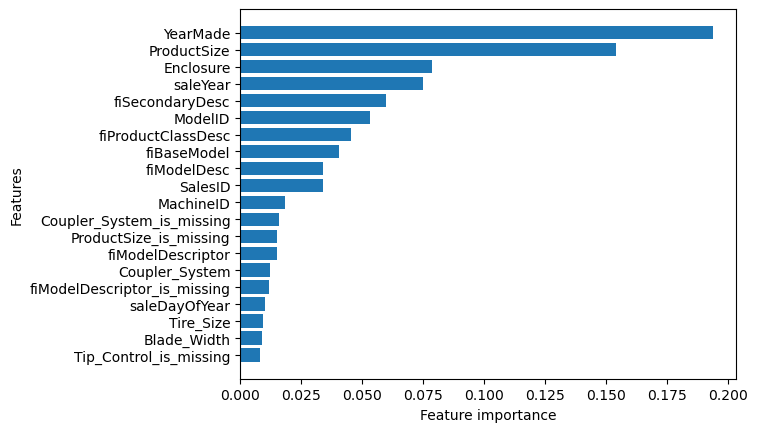

In [120]:
plot_features(X_train.columns, ideal_model.feature_importances_)

The plot is saying that the year that the bulldozer was made is the most important feature based on the ideal model\
and the ProductSize (the size class grouping for a product group. Subsets within product group).

In [123]:
df["ProductSize"].value_counts()

ProductSize
Medium            64342
Large / Medium    51297
Small             27057
Mini              25721
Large             21396
Compact            6280
Name: count, dtype: int64

The ProductSize is influencing the Sale Price

In [124]:
df["Enclosure"].value_counts()

Enclosure
OROPS                  177971
EROPS                  141769
EROPS w AC              92601
EROPS AC                   18
NO ROPS                     3
None or Unspecified         2
Name: count, dtype: int64

Enclosure (machine configuration - does a machine have an enclosed cab or not) also influences the Sale Price.

**Question to finish:** Why knowing the feature importance of a trained machine learning model be helpful?

Knowing the importance of features in a machine learning model is useful for several reasons:

* Relationship between features and target variable: the target variable (either classification or regression) depends on the features. Identifying which ones have the most influence helps to understand which variables provide the most information to the model to make accurate predictions.

* Model interpretability: Assessing the importance of the features allows interpreting how the model makes decisions. This is essential in many fields, such as medicine, finance and social sciences, where model predictions need to be justified.

* Dimensionality reduction: If you identify features with low importance (i.e. that provide little information), you might consider removing them to simplify the model, reduce noise and improve computational efficiency. This also helps prevent overfitting.

* Improved model design: By knowing which features are important, you can focus on collecting higher quality data or developing new derived variables that capture meaningful relationships with the target variable.

* Contextual information: In some cases, features with high importance can reveal interesting patterns or unexpected relationships in the data, which can help you gain additional insights.

Therefore, when a feature is important, it means that it has a significant impact on the model's predictions because it provides key information about the target variable. In contrast, features with low importance have less influence, and removing them may not negatively affect the model's performance, or may even improve it.

**Final challenge:** What other machine learning model could you try on our data set?

According to the "Choosing the right estimator" flowchart of Scikit-Learn: https://scikit-learn.org/dev/machine_learning_map.html \
we can try using the following regression algorithms: RidgeRegression, SVR(kernel='linear'), SVR(kernel='rbf') and EnsembleRegressors.\
Or maybe we can use something like: https://catboost.ai/ or https://xgboost.ai/